<a href="https://colab.research.google.com/github/IbniAkbar/Aplikasi-Nonton-Anime/blob/main/Cyberattack_Clustering_Wika.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd # Import the pandas module and assign it to the alias 'pd'
from google.colab import files
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import IsolationForest

drive.mount('/content/drive')

df = pd.read_excel("/content/drive/MyDrive/Colab Notebooks/Dataset/processed_log.xlsx") # Use pd.read_excel to read excel files

df.head()
df.info()
df.describe()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 48 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Domain               65532 non-null  int64  
 1   Receive Time         65532 non-null  object 
 2   Serial #             65532 non-null  int64  
 3   Type                 65532 non-null  object 
 4   Threat/Content Type  65532 non-null  object 
 5   Config Version       65532 non-null  int64  
 6   Generate Time        65532 non-null  object 
 7   Source address       65532 non-null  object 
 8   Destination address  65532 non-null  object 
 9   Rule                 50860 non-null  object 
 10  Source User          0 non-null      float64
 11  Application          65532 non-null  object 
 12  Virtual System       65532 non-null  object 
 13  Source 

,Domain,Serial #,Config Version,Source User,Session ID,Repeat Count,Source Port,Destination Port,Sequence Number,url_idx,SCTP Association ID,Payload Protocol ID,Year,Month,Day,Hour,Minute,Second
count,65532.0,6.553200e+04,65532.0,0.0,65532.000000,65532.000000,65532.000000,65532.000000,6.553200e+04,65532.000000,65532.0,6.553200e+04,65532.0,65532.000000,65532.000000,65532.000000,65532.000000,65532.000000
mean,1.0,1.200102e+10,2304.0,NaN,50316.935451,1.674434,36634.928462,3223.852332,1.091219e+08,0.823979,0.0,4.294967e+09,2024.0,6.948224,6.902399,13.618492,29.861930,29.918467
std,0.0,0.000000e+00,0.0,NaN,42941.857254,3.621131,20636.455638,7938.664433,1.552220e+06,10.650352,0.0,0.000000e+00,0.0,0.221577,6.550834,6.311357,17.272376,17.298677
min,1.0,1.200102e+10,2304.0,NaN,0.000000,1.000000,0.000000,0.000000,1.066304e+08,0.000000,0.0,4.294967e+09,2024.0,6.000000,1.000000,0.000000,0.000000,0.000000
25%,1.0,1.200102e+10,2304.0,NaN,4315.500000,1.000000,15841.000000,80.000000,1.078545e+08,0.000000,0.0,4.294967e+09,2024.0,7.000000,2.000000,9.000000,15.000000,15.000000
50%,1.0,1.200102e+10,2304.0,NaN,45373.000000,1.000000,40411.000000,82.000000,1.090954e+08,0.000000,0.0,4.294967e+09,2024.0,7.000000,5.000000,14.000000,30.000000,30.000000
75%,1.0,1.200102e+10,2304.0,NaN,88150.000000,1.000000,55124.000000,3306.000000,1.098756e+08,0.000000,0.0,4.294967e+09,2024.0,7.000000,9.000000,19.000000,45.000000,45.000000
max,1.0,1.200102e+10,2304.0,NaN,131071.000000,94.000000,65534.000000,65476.000000,1.129215e+08,252.000000,0.0,4.294967e+09,2024.0,7.000000,30.000000,23.000000,59.000000,59.000000


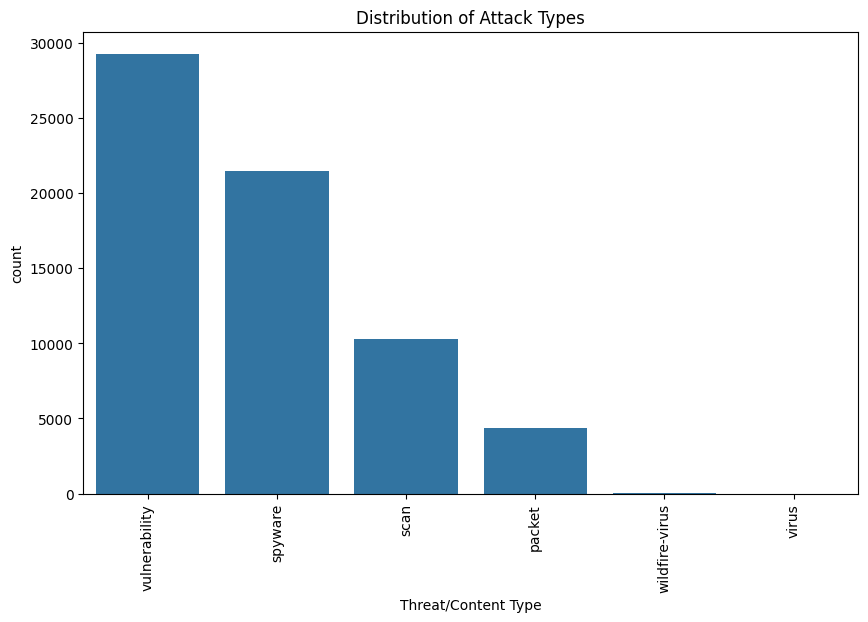

In [12]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Threat/Content Type', order=df['Threat/Content Type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Attack Types')
plt.show()

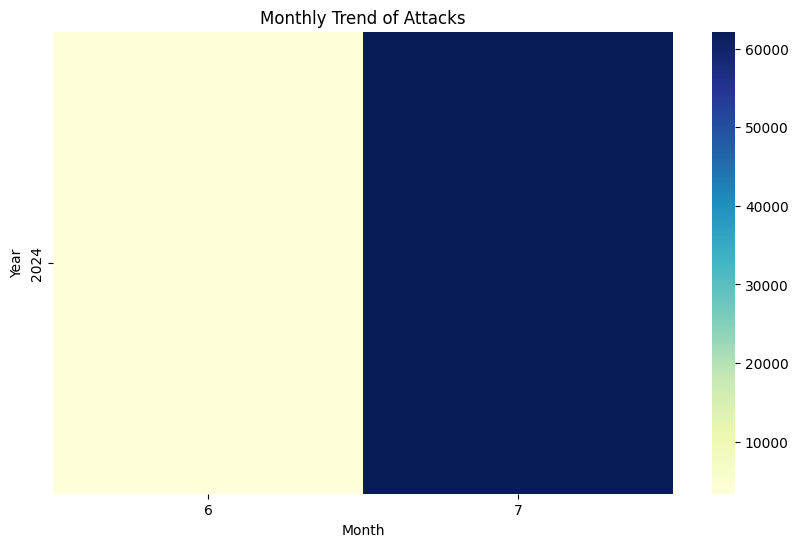

In [14]:
df['Month'] = pd.to_datetime(df['Receive Time']).dt.month
monthly_trend = df.groupby(['Year', 'Month']).size().unstack(fill_value=0)
plt.figure(figsize=(10,6))
sns.heatmap(monthly_trend, cmap='YlGnBu')
plt.title('Monthly Trend of Attacks')
plt.show()

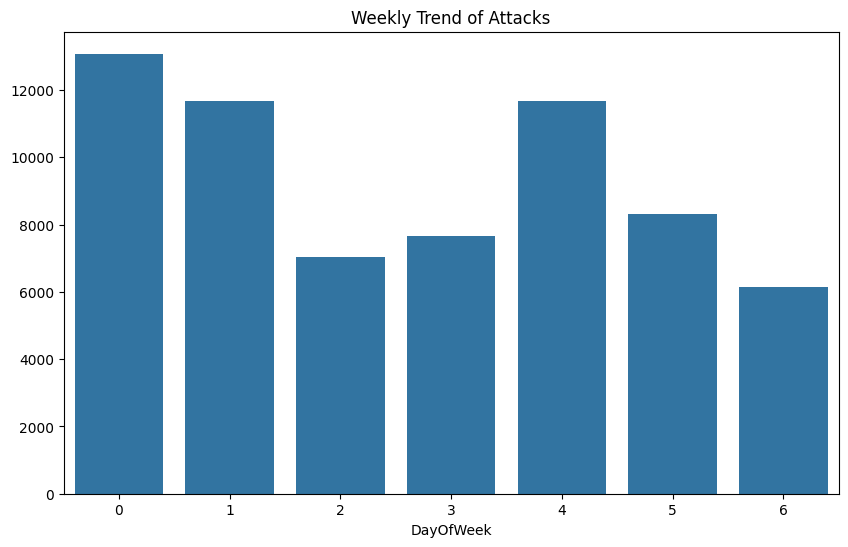

In [15]:
df['DayOfWeek'] = pd.to_datetime(df['Receive Time']).dt.dayofweek
weekly_trend = df['DayOfWeek'].value_counts().sort_index()
plt.figure(figsize=(10,6))
sns.barplot(x=weekly_trend.index, y=weekly_trend.values)
plt.title('Weekly Trend of Attacks')
plt.show()

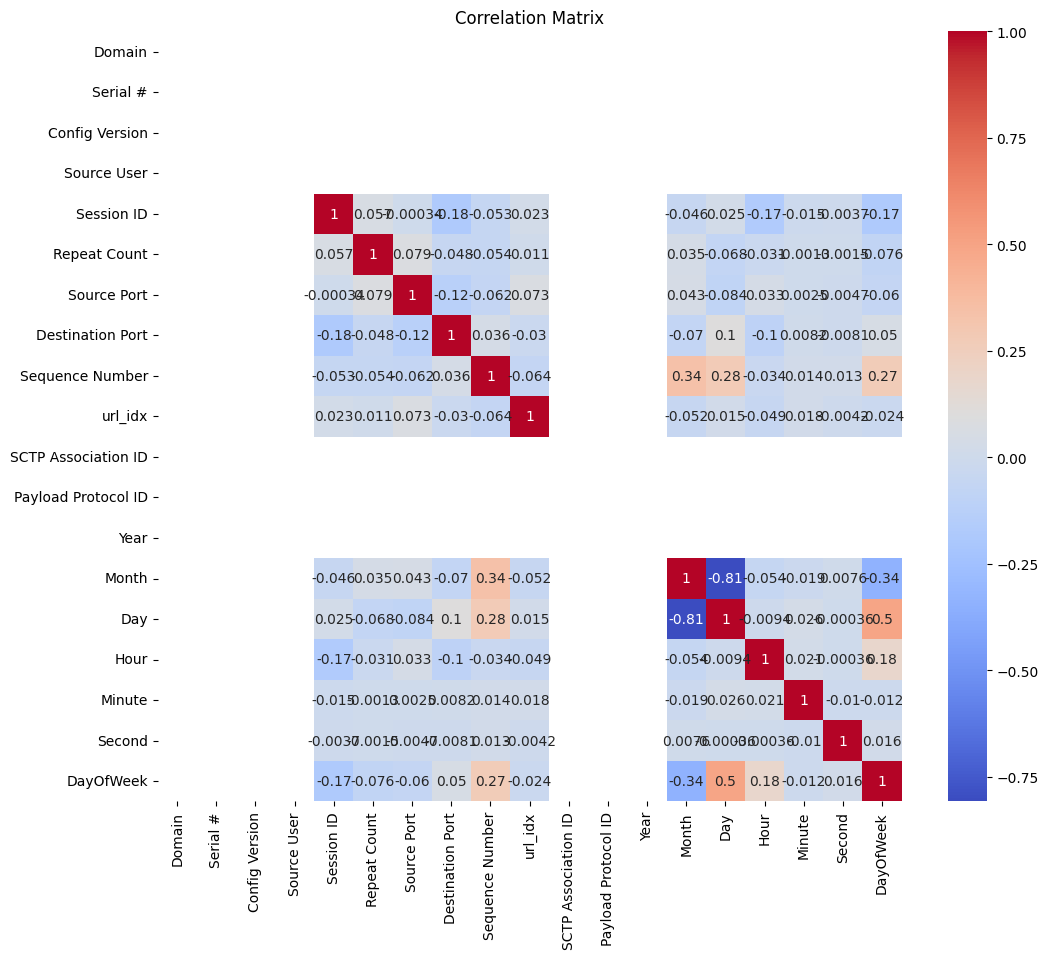

In [16]:
numeric_columns = df.select_dtypes(include=np.number).columns
corr_matrix = df[numeric_columns].corr()

plt.figure(figsize=(12,10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

<ipython-input-22-3159c3a2da52>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Severity'] = X['Severity'].map(severity_mapping)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


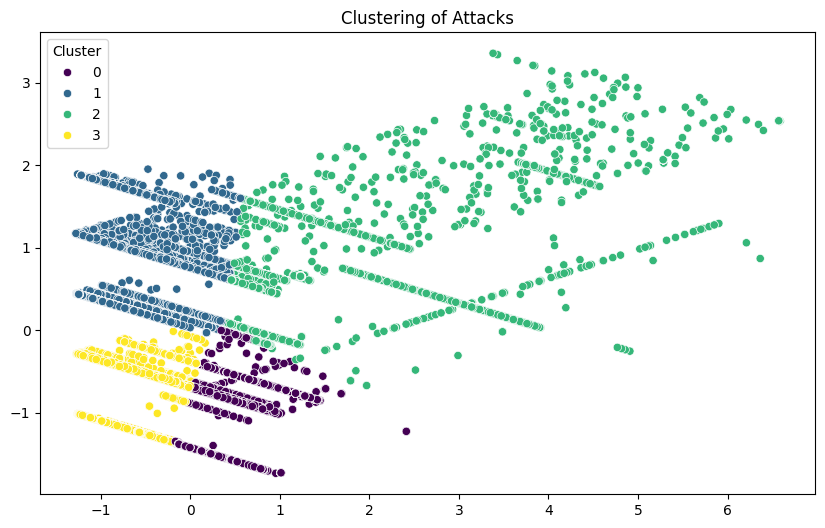

In [22]:
features = ['Source Port', 'Destination Port', 'Severity']
X = df[features]

severity_mapping = {'low': 0, 'medium': 1, 'high': 2, 'informational':3, 'critical':4}  # Assuming these are the possible values
X['Severity'] = X['Severity'].map(severity_mapping)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(X_pca)
df['Cluster'] = kmeans.labels_

plt.figure(figsize=(10,6))
sns.scatterplot(x=X_pca[:,0], y=X_pca[:,1], hue=df['Cluster'], palette='viridis')
plt.title('Clustering of Attacks')
plt.show()

df.to_csv('clustering_results.csv', index=False)

In [25]:
df['Severity'] = df['Severity'].map({'low': 0, 'medium': 1, 'high': 2, 'informational':3, 'critical':4})
X = df[features]
y = df['Severity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 285    0    0    0    0]
 [   0 8286    0    0    0]
 [   0    0 1516    0    0]
 [   0    0    0 4225    0]
 [   0    0    0    0 5348]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       285
           1       1.00      1.00      1.00      8286
           2       1.00      1.00      1.00      1516
           3       1.00      1.00      1.00      4225
           4       1.00      1.00      1.00      5348

    accuracy                           1.00     19660
   macro avg       1.00      1.00      1.00     19660
weighted avg       1.00      1.00      1.00     19660



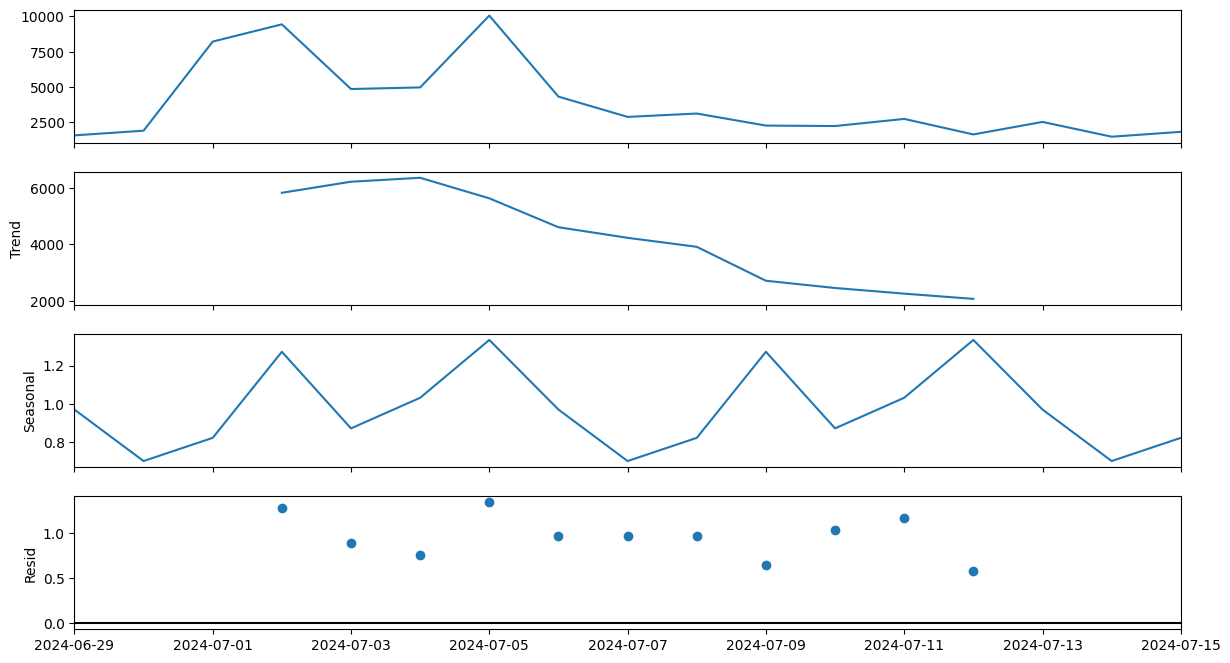

In [26]:
from statsmodels.tsa.seasonal import seasonal_decompose

df['Receive Time'] = pd.to_datetime(df['Receive Time'])
df.set_index('Receive Time', inplace=True)
attack_counts = df.resample('D').size()

decomposition = seasonal_decompose(attack_counts, model='multiplicative')
fig = decomposition.plot()
fig.set_size_inches(14, 7)
plt.show()

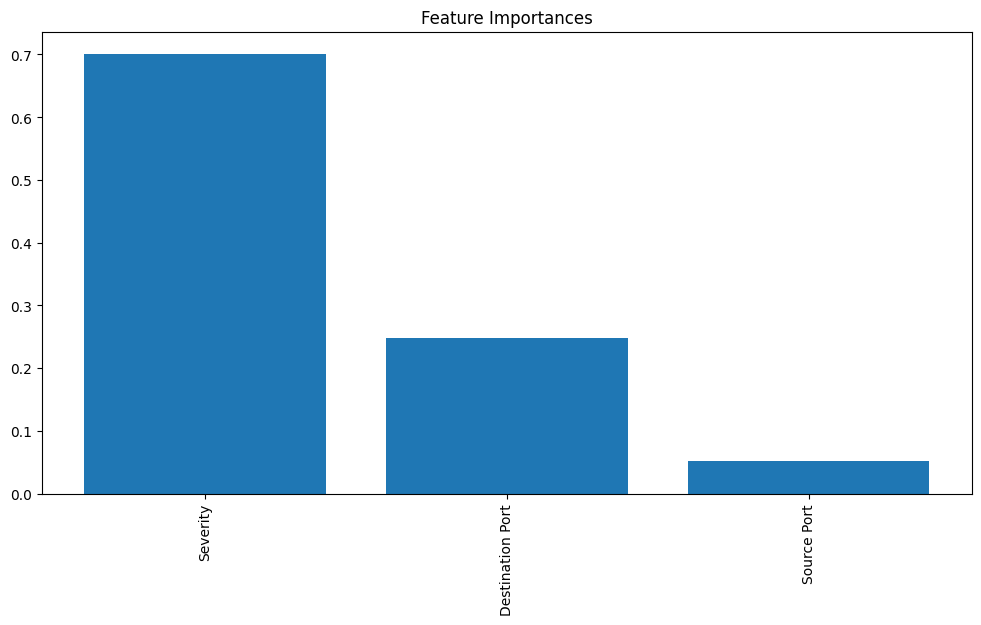

In [27]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
indices = np.argsort(importances)[::-1]
features = [features[i] for i in indices]

plt.figure(figsize=(12, 6))
plt.title('Feature Importances')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), features, rotation=90)
plt.show()

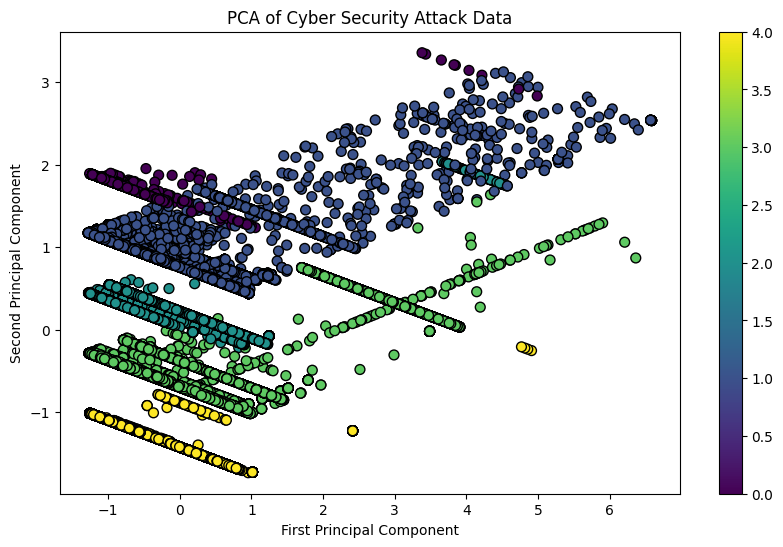

In [28]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k', s=50)
plt.title('PCA of Cyber Security Attack Data')
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.colorbar()
plt.show()

In [29]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

best_rf = grid_search.best_estimator_
y_pred_best = best_rf.predict(X_test)

print(confusion_matrix(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))
print(f"Best parameters found: {grid_search.best_params_}")

Fitting 3 folds for each of 108 candidates, totalling 324 fits
[[ 285    0    0    0    0]
 [   0 8286    0    0    0]
 [   0    0 1516    0    0]
 [   0    0    0 4225    0]
 [   0    0    0    0 5348]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       285
           1       1.00      1.00      1.00      8286
           2       1.00      1.00      1.00      1516
           3       1.00      1.00      1.00      4225
           4       1.00      1.00      1.00      5348

    accuracy                           1.00     19660
   macro avg       1.00      1.00      1.00     19660
weighted avg       1.00      1.00      1.00     19660

Best parameters found: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
